# House Loan Data Analysis


### Step 1: Load the Dataset


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'loan_data.csv'  # Update path if the file is not in the current directory
loan_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print("Dataset Loaded Successfully! Here's a preview:")
print(loan_data.head())

# Check the dataset shape (number of rows and columns)
print(f"\nDataset contains {loan_data.shape[0]} rows and {loan_data.shape[1]} columns.")


Dataset Loaded Successfully! Here's a preview:
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUM

### Step 2: Check for Null Values

1. Identify columns with missing values.

2. Calculate the percentage of missing values in each column.

3. Decide on the appropriate handling strategy (dropping rows/columns or filling missing values).





In [2]:
# Step 1: Check for missing values
missing_values = loan_data.isnull().sum()

# Print columns with missing values
print("Missing values per column:")
print(missing_values[missing_values > 0])

# Step 2: Handle missing values
# Option 1: Drop rows with missing target values (if any)
loan_data = loan_data.dropna(subset=['TARGET'])

# Option 2: Fill missing values for numerical columns with median
numerical_cols = loan_data.select_dtypes(include=['float64', 'int64']).columns
loan_data[numerical_cols] = loan_data[numerical_cols].fillna(loan_data[numerical_cols].median())

# Option 3: Fill missing values for categorical columns with the most frequent value
categorical_cols = loan_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    loan_data[col] = loan_data[col].fillna(loan_data[col].mode()[0])

# Verify that there are no missing values
missing_values_after = loan_data.isnull().sum()
print("\nMissing values after handling:")
print(missing_values_after[missing_values_after > 0])


Missing values per column:
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 67, dtype: int64

Missing values after handling:
Series([], dtype: int64)


### Step 3: Analyze the Imbalance

1. Check the distribution of the TARGET column (default vs. non-default).
2. Compute and print the percentage of each class to understand the level of imbalance.




Distribution of the TARGET column:
TARGET
0    282686
1     24825
Name: count, dtype: int64

Percentage of each class:
TARGET
0    91.927118
1     8.072882
Name: count, dtype: float64


<ipython-input-3-b966e725bcd3>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')


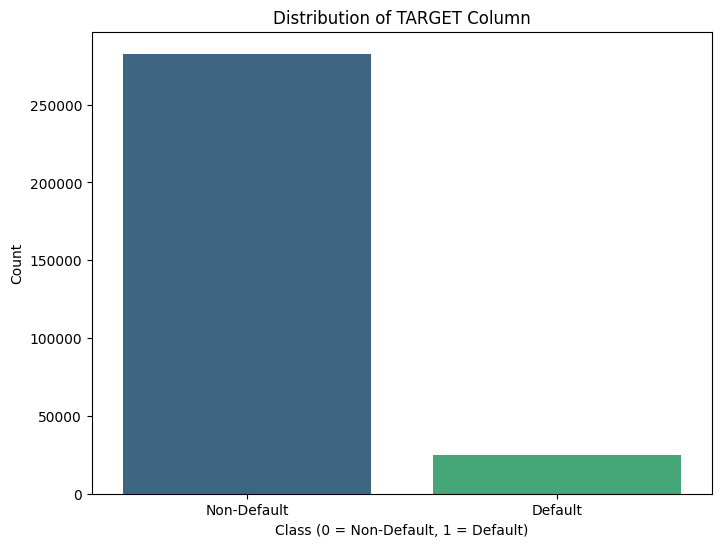

In [3]:
# Check the distribution of the TARGET column
target_counts = loan_data['TARGET'].value_counts()

# Calculate the percentage of each class
target_percentages = (target_counts / len(loan_data)) * 100

# Print the results
print("Distribution of the TARGET column:")
print(target_counts)
print("\nPercentage of each class:")
print(target_percentages)

# Visualize the distribution of the TARGET column
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')
plt.title("Distribution of TARGET Column")
plt.xlabel("Class (0 = Non-Default, 1 = Default)")
plt.ylabel("Count")
plt.xticks([0, 1], ["Non-Default", "Default"])
plt.show()


### Step 4: Balancing the Dataset

1.   **Undersampling**: Reducing the majority class samples (0).
2.   **Oversampling**: Increasing the minority class samples (1) using techniques like SMOTE (Synthetic Minority Oversampling Technique).
3.   **Custom Sampling**: Manually adjust the class distributions.




In [4]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter

# Separate features (X) and target (y)
X = loan_data.drop(columns=['TARGET'])
y = loan_data['TARGET']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply Label Encoding to all categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))  # Convert to string and encode
    label_encoders[col] = le

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the new class distribution in the training set
print("Class distribution after balancing (Training Set):")
print(Counter(y_train_balanced))

# Print the shape of the balanced data
print(f"Balanced Training Data Shape: {X_train_balanced.shape}")


Class distribution after balancing (Training Set):
Counter({0: 226148, 1: 226148})
Balanced Training Data Shape: (452296, 121)


### Step 5: Visualizing the Balanced Data


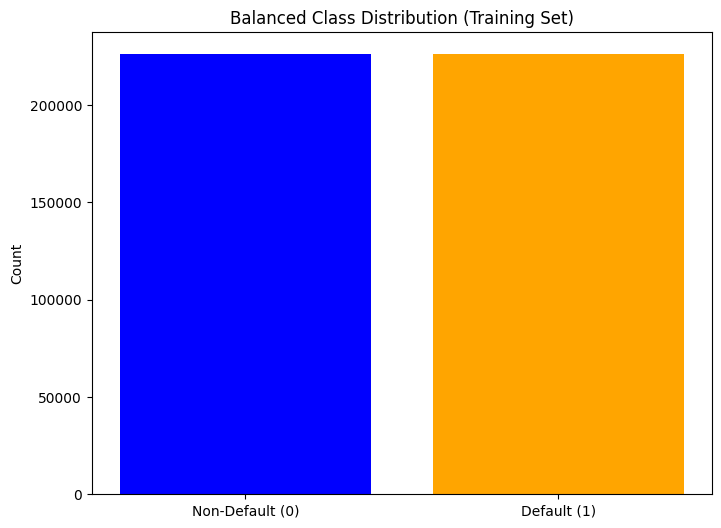

In [5]:
import matplotlib.pyplot as plt

# Plot the new balanced distribution
plt.figure(figsize=(8, 6))
plt.bar(['Non-Default (0)', 'Default (1)'], Counter(y_train_balanced).values(), color=['blue', 'orange'])
plt.title("Balanced Class Distribution (Training Set)")
plt.ylabel("Count")
plt.show()


### Step 6: Encode the Columns Required for the Model.

In [6]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_cols = X.select_dtypes(include=[np.number]).columns

# Standardize numerical features (mean=0, std=1)
scaler = StandardScaler()
X_train_balanced[numerical_cols] = scaler.fit_transform(X_train_balanced[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Verify the transformation
print("First few rows of the scaled data (for numerical columns):")
print(X_train_balanced[numerical_cols].head())


First few rows of the scaled data (for numerical columns):
   SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0    0.318867           -0.270363    -0.621620     -0.550458        -1.206607   
1    0.856551           -0.270363     1.608629      1.816670         0.828770   
2   -0.350852           -0.270363     1.608629     -0.550458         0.828770   
3    1.730634           -0.270363     1.608629     -0.550458        -1.206607   
4    1.666352           -0.270363    -0.621620     -0.550458         0.828770   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0      2.628326         -0.233787   -0.931558    -1.016968        -0.973951   
1     -0.520768         -0.233787   -1.105641    -1.024057        -1.104637   
2     -0.520768         -0.094609    0.394968    -0.032946         0.110740   
3     -0.520768         -0.094609   -0.278880     0.591900        -0.359728   
4     -0.520768          0.044569   -0.859639     0.060899 

### Step 7: Calculate Sensitivity (Recall).

1.   **Train the model**: We'll build a simple neural network for this step to calculate the sensitivity. You can use more complex models later if needed.
2.  **Make predictions**: Use the trained model to predict on the test data.
3.  **Calculate Sensitivity**: Use the true labels (y_test) and predicted labels to calculate sensitivity.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import recall_score
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Compute class weights to handle imbalance (keeping the weights more balanced)
classes = np.array([0, 1])
class_weights = compute_class_weight('balanced', classes=classes, y=y_train_balanced)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Build a simpler neural network model
model = Sequential([
    Dense(128, input_dim=X_train_balanced.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with a smaller learning rate
optimizer = Adam(learning_rate=0.0001)  # Smaller learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Apply early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with class weights and early stopping
history = model.fit(X_train_balanced, y_train_balanced, epochs=50, batch_size=32,
                    validation_data=(X_test, y_test),
                    class_weight=class_weight_dict,
                    callbacks=[early_stopping])

# Make predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate Sensitivity (Recall)
sensitivity = recall_score(y_test, y_pred)
print(f"Sensitivity (Recall) after further improvements: {sensitivity}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.8150 - loss: 0.4120 - val_accuracy: 0.8369 - val_loss: 0.3993
Epoch 2/50
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.8691 - loss: 0.3140 - val_accuracy: 0.8495 - val_loss: 0.3769
Epoch 3/50
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.8805 - loss: 0.2899 - val_accuracy: 0.8570 - val_loss: 0.3640
Epoch 4/50
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.8882 - loss: 0.2737 - val_accuracy: 0.8510 - val_loss: 0.3754
Epoch 5/50
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.8940 - loss: 0.2619 - val_accuracy: 0.8601 - val_loss: 0.3604
Epoch 6/50
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.8988 - loss: 0.2517 - val_accuracy: 0.8753 - val_loss: 0.3350
Epoch 7/50
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.9005 - loss: 0.2479 - val_accuracy: 0.8645 - val_loss: 0.3542
Epoch 8/50
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 

### Step 8: Calculate AUC-ROC

1.   Use predict_proba() to get the probability scores for the positive class (defaults).
2.   Use the roc_auc_score from sklearn to calculate the AUC score.
3.   Plot the ROC Curve to visualize the model's performance.



1922/1922 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
AUC-ROC Score: 0.6767034831567265


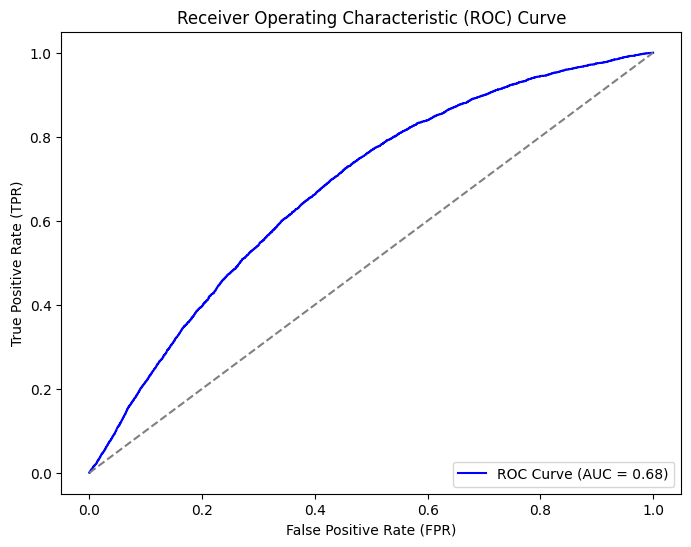

In [10]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 1: Get the probability scores for the positive class (1) from the neural network model
y_prob = model.predict(X_test)[:, 0]  # The second column for the positive class

# Step 2: Calculate the AUC score
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC Score: {auc_score}")

# Step 3: Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



### Step 9: Model Evaluation

Confusion Matrix:
[[53190  3348]
 [ 4322   643]]


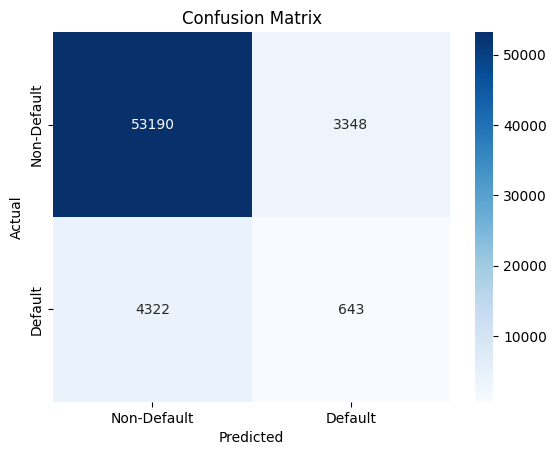

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     56538
           1       0.16      0.13      0.14      4965

    accuracy                           0.88     61503
   macro avg       0.54      0.54      0.54     61503
weighted avg       0.86      0.88      0.87     61503



In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Step 1: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Step 2: Visualize the Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Default', 'Default'], yticklabels=['Non-Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 3: Precision, Recall, F1-Score
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)
